In [ ]:
'''
Deep Learning Stock Price Predictor 
Author: Gil Akos
Objective: Create Benchmark Model with scikit learn regression
'''

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Import required libraries for Machine Learning
import math
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing

#Import required libraries for Yahoo Finance API
import yahoo_finance as yf
from yahoo_finance import Share

#Import required libraries for visualization and printing
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [2]:
#Set Benchmark Dates
date_start, date_end = '2009-01-01', '2016-06-18'#'2015-06-18'

#Set Model Baseline Ticker
base_ticker = 'SPY'

#Set Additional Tickers

In [3]:
#Request Stock Data
stock_data = Share(base_ticker)
stock_historical = stock_data.get_historical(date_start,date_end)

#pprint(stock_historical)

#Define columns of data to keep from historical stock data
stock_item = []
stock_date = []
stock_close = []
stock_volume = []

#Loop through the stock data objects backwards and store factors we want to keep
i_counter = 0
for i in xrange(len(stock_historical)-1,-1,-1):
    d = stock_historical[i]
    stock_item.append(i_counter)
    stock_date.append(d['Date'])
    stock_close.append(d['Adj_Close'])
    stock_volume.append(d['Volume'])
    i_counter += 1

#Create a dataframe for stock data
stock_df = pd.DataFrame()
    
#Add factors to dataframe
stock_df['Item'] = stock_item
stock_df['Date'] = stock_date
stock_df['Adj_Close'] = pd.to_numeric(stock_close)
stock_df['Volume'] = pd.to_numeric(stock_volume)

#Print the dataframe head and tail
print(stock_df.head())
print("---")
print(stock_df.tail())

   Item        Date  Adj_Close     Volume
0     0  2009-01-02  78.738477  227566300
1     1  2009-01-05  78.645305  240349700
2     2  2009-01-06  79.170456  328260900
3     3  2009-01-07  76.798813  280899200
4     4  2009-01-08  77.112211  263834400
---
      Item        Date   Adj_Close     Volume
1873  1873  2016-06-13  205.120344  117751200
1874  1874  2016-06-14  204.716890  125059300
1875  1875  2016-06-15  204.431528  109124500
1876  1876  2016-06-16  205.041620  149533100
1877  1877  2016-06-17  204.278004  117055700


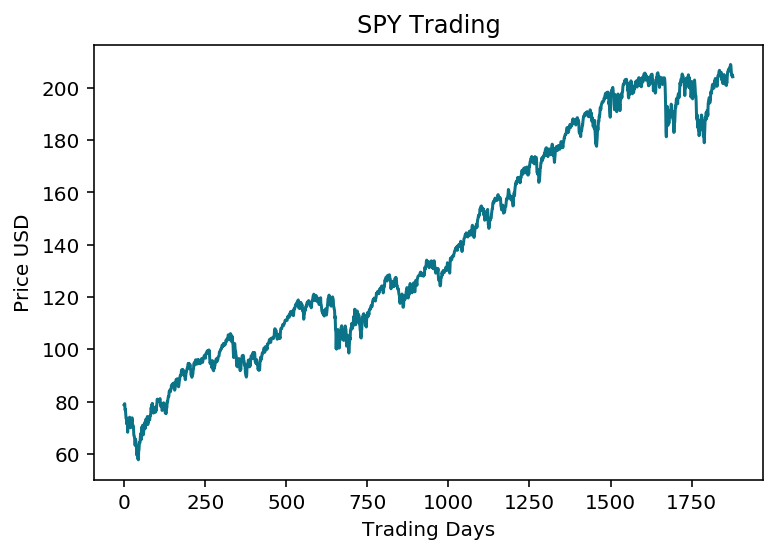

In [4]:
#Plot Basic Data
fig, ax = plt.subplots()
ax.plot(stock_df['Item'], stock_df['Adj_Close'], '#0A7388')

# format the coords message box
def price(x):
    return '$%1.2f' % x
#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.set_title(base_ticker + ' Trading')

# Add labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

plt.show()

In [5]:
#Create numpy arrays for features and targets
X_all = []
y_all = []

#Convert dataframe columns to numpy arrays for scikit learn
for index, row in stock_df.iterrows():
    #print([np.array(row['Item'])])
    X_all.append([(row['Item'])])
    y_all.append([(row['Adj_Close'])])

#pprint(X_all)
pprint(y_all)

[[78.738477],
 [78.64530500000001],
 [79.170456],
 [76.798813],
 [77.112211],
 [75.460528],
 [73.647917],
 [73.783443],
 [71.462625],
 [71.488034],
 [72.04706],
 [68.243967],
 [71.19158],
 [70.090459],
 [70.39538399999999],
 [70.878182],
 [71.59814399999999],
 [74.020606],
 [71.615088],
 [70.158221],
 [69.94646800000001],
 [70.929001],
 [70.58172900000001],
 [71.632025],
 [73.673333],
 [73.774971],
 [70.39538399999999],
 [70.81042],
 [70.861245],
 [70.09893100000001],
 [67.100498],
 [66.939563],
 [66.21960200000001],
 [65.575869],
 [63.229642000000005],
 [65.626695],
 [65.110015],
 [64.051247],
 [62.61979],
 [59.79923],
 [59.350313],
 [60.756361],
 [58.274606999999996],
 [58.376245],
 [57.690165],
 [61.129043],
 [61.52714],
 [63.949603],
 [64.449338],
 [64.254529],
 [66.21960200000001],
 [67.70187800000001],
 [66.86333499999999],
 [65.439545],
 [70.140001],
 [68.758014],
 [69.48312800000001],
 [70.899239],
 [69.619624],
 [67.21394699999999],
 [67.836689],
 [69.150429],
 [71.172224],
 [

In [6]:
# Regularize the feature and target arrays

scaler_X = preprocessing.StandardScaler().fit(X_all)
scaler_y = preprocessing.StandardScaler().fit(y_all)

X_scaled = scaler_X.transform(X_all)
y_scaled = scaler_y.transform(y_all)

print min(y_all), max(y_all)
print scaler_y.scale_

pprint(y_scaled)

[57.690165] [208.97772700000002]
[ 42.52648068]
array([[-1.44608663],
       [-1.44827755],
       [-1.43592875],
       ..., 
       [ 1.50955534],
       [ 1.52390151],
       [ 1.50594526]])


In [ ]:
# Scale function

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std / (max - min) + min

In [7]:
# Define Test/Train Split 80/20
tt_split = .20
tti_split = int(math.floor(len(stock_df['Item'])*tt_split))

# Set up training and test sets
X_train = X_scaled[:-tti_split]
X_test = X_scaled[-tti_split:]

y_train = y_scaled[:-tti_split]
y_test = y_scaled[-tti_split:]

#pprint(X_train)
#pprint(X_test)

# Create dataframe for all training, testing, and predicted sets
results_df = pd.DataFrame(columns=['Item', 'Actual', 'Actual_Scaled', 'Train', 'Test', 'Predicted'])
results_df['Item'] = stock_df['Item']
results_df['Actual'] = stock_df['Adj_Close']
results_df['Actual_Scaled'] = y_scaled.flatten()
results_df['Train'][:-tti_split] = y_train.flatten()
results_df['Test'][-tti_split:] = y_test.flatten()

pprint(results_df)


      Item      Actual  Actual_Scaled    Train     Test Predicted
0        0   78.738477      -1.446087 -1.44609      NaN       NaN
1        1   78.645305      -1.448278 -1.44828      NaN       NaN
2        2   79.170456      -1.435929 -1.43593      NaN       NaN
3        3   76.798813      -1.491697  -1.4917      NaN       NaN
4        4   77.112211      -1.484328 -1.48433      NaN       NaN
5        5   75.460528      -1.523167 -1.52317      NaN       NaN
6        6   73.647917      -1.565790 -1.56579      NaN       NaN
7        7   73.783443      -1.562603  -1.5626      NaN       NaN
8        8   71.462625      -1.617177 -1.61718      NaN       NaN
9        9   71.488034      -1.616579 -1.61658      NaN       NaN
10      10   72.047060      -1.603434 -1.60343      NaN       NaN
11      11   68.243967      -1.692863 -1.69286      NaN       NaN
12      12   71.191580      -1.623550 -1.62355      NaN       NaN
13      13   70.090459      -1.649443 -1.64944      NaN       NaN
14      14

/Users/gilakos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gilakos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Store the predictions
results_df['Predicted'][-tti_split:] = regr.predict(X_test).flatten()

pprint(results_df)

      Item      Actual  Actual_Scaled    Train     Test Predicted
0        0   78.738477      -1.446087 -1.44609      NaN       NaN
1        1   78.645305      -1.448278 -1.44828      NaN       NaN
2        2   79.170456      -1.435929 -1.43593      NaN       NaN
3        3   76.798813      -1.491697  -1.4917      NaN       NaN
4        4   77.112211      -1.484328 -1.48433      NaN       NaN
5        5   75.460528      -1.523167 -1.52317      NaN       NaN
6        6   73.647917      -1.565790 -1.56579      NaN       NaN
7        7   73.783443      -1.562603  -1.5626      NaN       NaN
8        8   71.462625      -1.617177 -1.61718      NaN       NaN
9        9   71.488034      -1.616579 -1.61658      NaN       NaN
10      10   72.047060      -1.603434 -1.60343      NaN       NaN
11      11   68.243967      -1.692863 -1.69286      NaN       NaN
12      12   71.191580      -1.623550 -1.62355      NaN       NaN
13      13   70.090459      -1.649443 -1.64944      NaN       NaN
14      14

/Users/gilakos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


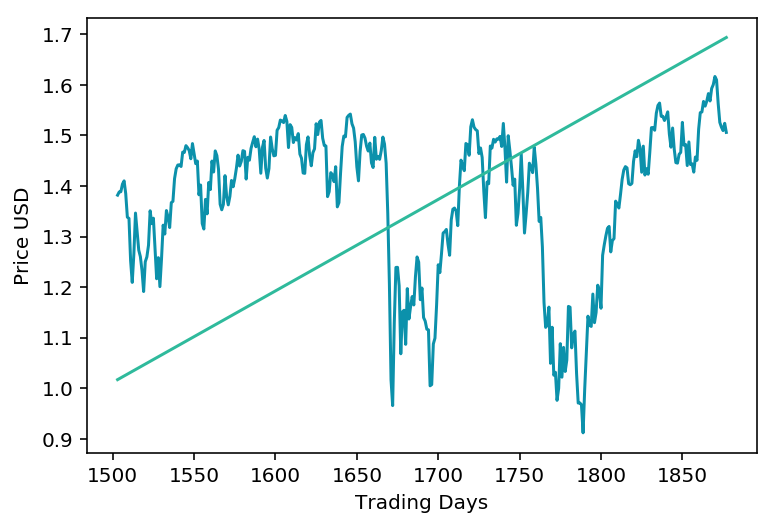

In [10]:
# Plot the training, testing, and predicted data
#plt.plot(results_df['Item'], results_df['Actual_Scaled'], '#0A7388')
plt.plot(results_df['Item'], results_df['Test'], '#0C91AB')
plt.plot(results_df['Item'], results_df['Predicted'], '#2FBA9C')

#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#actual.format_ydata = price
#plt.set_title(base_ticker + ' Trading')

# Add labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

plt.show()

In [11]:
# Print the coefficients
print('Coefficients: %.3f' % regr.coef_)
# The mean squared error
print("Mean squared error: %.3f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % regr.score(X_test, y_test))

Coefficients: 0.981
Mean squared error: 0.061
Variance score: -1.800
